In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
jpn_dataset = pd.read_excel("/content/JPN_Data.xlsx")

In [5]:
jpn_dataset.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


### Data Preprocessing

- Data Cleaning

        Handling Missing Values
        Removing Duplicates

In [6]:
#  Handling Missing Values
jpn_dataset.isnull().sum()

,0
ID,0
CURR_AGE,0
GENDER,0
ANN_INCOME,0
AGE_CAR,0
PURCHASE,0


In [7]:
# Removing Duplicates
jpn_dataset.duplicated().sum()

0

In [8]:
# count of purchased and not purchased
purchased, not_purchased = jpn_dataset['PURCHASE'].value_counts()
print(f"Purchased : {purchased}")
print(f"Not Purchased : {not_purchased}")

Purchased : 23031
Not Purchased : 16969


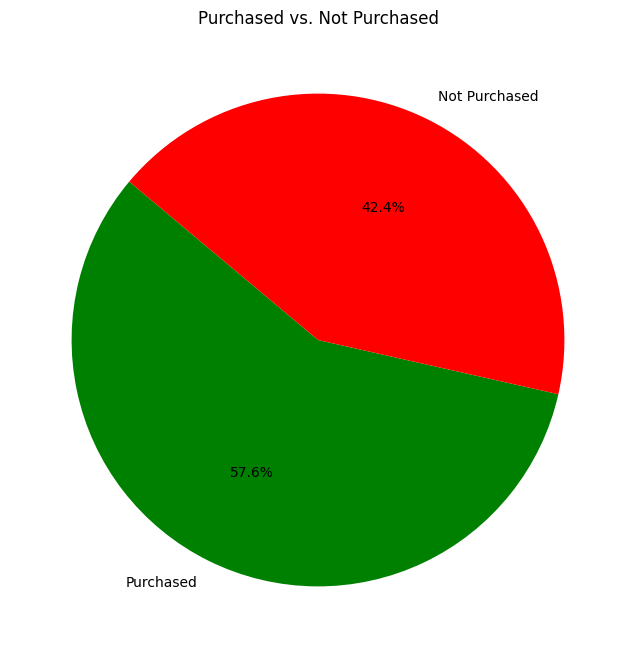

In [9]:
categories = ['Purchased', 'Not Purchased']  # Categories
counts = [purchased, not_purchased]  # Corresponding counts
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Purchased vs. Not Purchased')
plt.show()

In [10]:
male,female = jpn_dataset['GENDER'].value_counts()
print(f"Male : {male}")
print(f"Female : {female}")

Male : 22285
Female : 17715


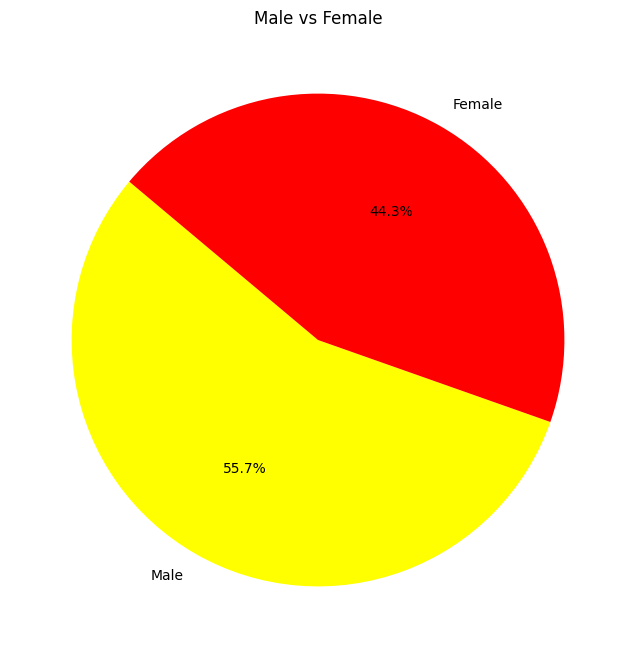

In [11]:
genders = ['Male','Female']  # Genders
counts = [male, female]  # Corresponding counts
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=genders, autopct='%1.1f%%', startangle=140, colors=['yellow', 'red'])
plt.title('Male vs Female')
plt.show()

### Number of Male vs Female who bought car

In [12]:
new_df = jpn_dataset.groupby('GENDER')['PURCHASE'].value_counts()

In [13]:
new_df

GENDER  PURCHASE
F       1            9836
        0            7879
M       1           13195
        0            9090
Name: count, dtype: int64

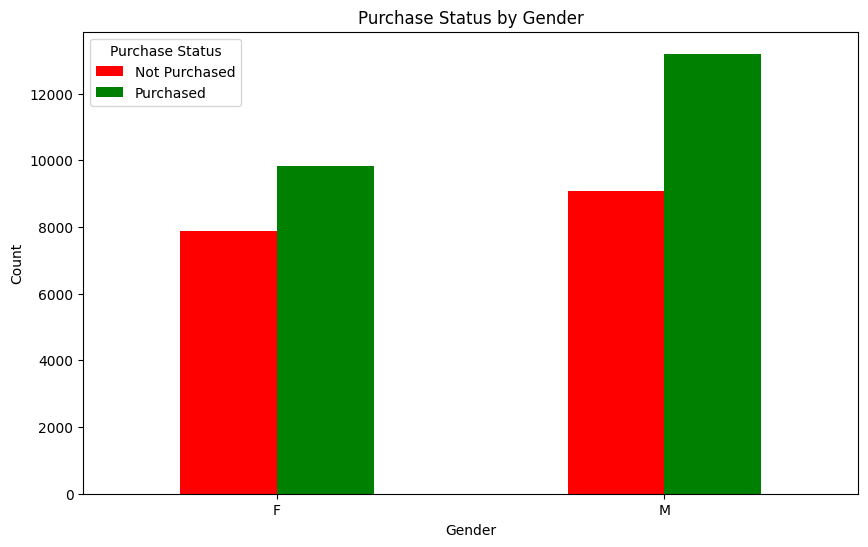

In [14]:
# Convert the series to a DataFrame and reset index for easier plotting
new_df = new_df.unstack()

new_df.plot(kind='bar', figsize=(10, 6), color=['red', 'green'])

plt.title('Purchase Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Purchased', 'Purchased'], title='Purchase Status')

plt.show()

In [15]:
jpn_dataset.describe()

,CURR_AGE,ANN_INCOME,AGE_CAR,PURCHASE
count,40000.00000,40000.000000,40000.000000,40000.000000
mean,44.99745,359398.878050,359.080250,0.575775
std,11.82008,175109.262950,203.063724,0.494231
min,25.00000,70089.000000,1.000000,0.000000
25%,35.00000,219766.000000,235.000000,0.000000
50%,45.00000,337656.833333,331.000000,1.000000
75%,55.00000,464261.000000,444.000000,1.000000
max,65.00000,799970.666667,1020.000000,1.000000


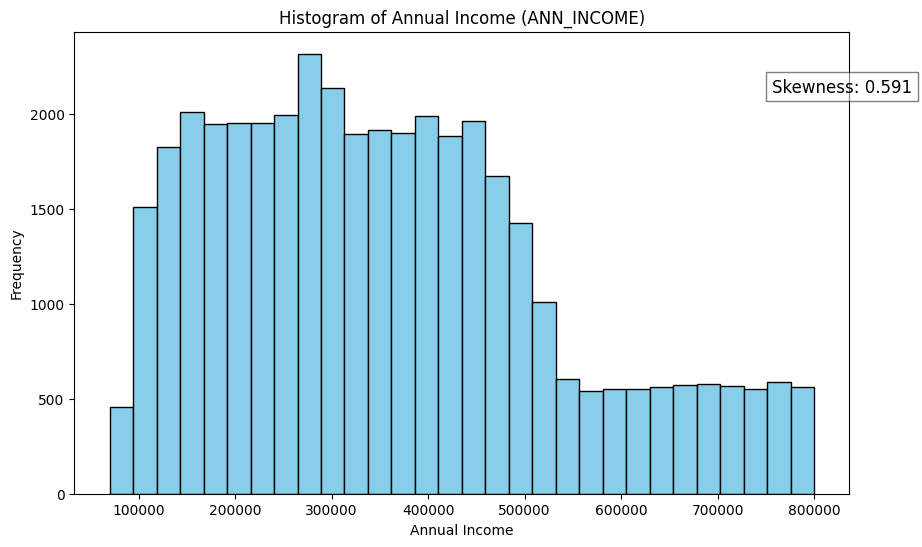

In [16]:
# let's check whether the data is skewed or not

data = jpn_dataset['ANN_INCOME']
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram of Annual Income (ANN_INCOME)')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Display skewness value on the plot
plt.text(0.9, 0.9, f'Skewness: {0.5909611285071191:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [17]:
from scipy.stats import skew

# Calculate skewness
skewness_value = skew(data)
print("Skewness:", skewness_value)

Skewness: 0.5909611285071191


In [18]:
jpn_dataset.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


In [19]:
jpn_dataset['ENCODED_GENDER'] = jpn_dataset['GENDER'].map({'M': 0, 'F': 1})

In [20]:
jpn_dataset.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE,ENCODED_GENDER
0,00001Q15YJ,50,M,445344.000000,439,0,0
1,00003I71CQ,35,M,107634.000000,283,0,0
2,00003N47FS,59,F,502786.666667,390,1,1
3,00005H41DE,43,M,585664.000000,475,0,0
4,00007E17UM,39,F,705722.666667,497,1,1


In [21]:
jpn_dataset['less_200'] = jpn_dataset['AGE_CAR'].apply(lambda x: 1 if x <= 200 else 0)
jpn_dataset['between_200_360'] = jpn_dataset['AGE_CAR'].apply(lambda x: 1 if 200 < x <= 360 else 0)
jpn_dataset['between_360_500'] = jpn_dataset['AGE_CAR'].apply(lambda x: 1 if 360 < x <= 500 else 0)
jpn_dataset['more_500'] = jpn_dataset['AGE_CAR'].apply(lambda x: 1 if x > 500 else 0)

In [22]:
jpn_dataset.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE,ENCODED_GENDER,less_200,between_200_360,between_360_500,more_500
0,00001Q15YJ,50,M,445344.000000,439,0,0,0,0,1,0
1,00003I71CQ,35,M,107634.000000,283,0,0,0,1,0,0
2,00003N47FS,59,F,502786.666667,390,1,1,0,0,1,0
3,00005H41DE,43,M,585664.000000,475,0,0,0,0,1,0
4,00007E17UM,39,F,705722.666667,497,1,1,0,0,1,0


In [23]:
final_dataset = jpn_dataset[['CURR_AGE','less_200',	'between_200_360','between_360_500','more_500','ANN_INCOME','ENCODED_GENDER','PURCHASE']]

In [24]:
final_dataset.shape

(40000, 8)

In [25]:
final_dataset.head()

,CURR_AGE,less_200,between_200_360,between_360_500,more_500,ANN_INCOME,ENCODED_GENDER,PURCHASE
0,50,0,0,1,0,445344.000000,0,0
1,35,0,1,0,0,107634.000000,0,0
2,59,0,0,1,0,502786.666667,1,1
3,43,0,0,1,0,585664.000000,0,0
4,39,0,0,1,0,705722.666667,1,1


In [26]:
final_dataset = final_dataset.drop_duplicates()

In [27]:
final_dataset.isnull().sum()

,0
CURR_AGE,0
less_200,0
between_200_360,0
between_360_500,0
more_500,0
ANN_INCOME,0
ENCODED_GENDER,0
PURCHASE,0


In [28]:
final_dataset.duplicated().sum()

0

In [29]:
final_dataset.describe()

,CURR_AGE,less_200,between_200_360,between_360_500,more_500,ANN_INCOME,ENCODED_GENDER,PURCHASE
count,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000
mean,44.997950,0.162078,0.413022,0.292401,0.132498,359415.413731,0.442878,0.575801
std,11.820759,0.368527,0.492383,0.454871,0.339036,175115.382571,0.496733,0.494227
min,25.000000,0.000000,0.000000,0.000000,0.000000,70089.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,219795.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,0.000000,0.000000,337728.000000,0.000000,1.000000
75%,55.000000,0.000000,1.000000,1.000000,0.000000,464291.000000,1.000000,1.000000
max,65.000000,1.000000,1.000000,1.000000,1.000000,799970.666667,1.000000,1.000000


In [30]:
final_dataset.corr()

,CURR_AGE,less_200,between_200_360,between_360_500,more_500,ANN_INCOME,ENCODED_GENDER,PURCHASE
CURR_AGE,1.000000,0.045417,-0.059811,-0.068622,0.129564,0.184894,0.015813,-0.012137
less_200,0.045417,1.000000,-0.368924,-0.282720,-0.171882,0.000917,-0.025370,-0.188405
between_200_360,-0.059811,-0.368924,1.000000,-0.539227,-0.327828,-0.022531,0.022343,-0.256789
between_360_500,-0.068622,-0.282720,-0.539227,1.000000,-0.251227,-0.020237,-0.012064,0.275131
more_500,0.129564,-0.171882,-0.327828,-0.251227,1.000000,0.058877,0.011313,0.208598
ANN_INCOME,0.184894,0.000917,-0.022531,-0.020237,0.058877,1.000000,0.026620,0.169891
ENCODED_GENDER,0.015813,-0.025370,0.022343,-0.012064,0.011313,0.026620,1.000000,-0.036931
PURCHASE,-0.012137,-0.188405,-0.256789,0.275131,0.208598,0.169891,-0.036931,1.000000


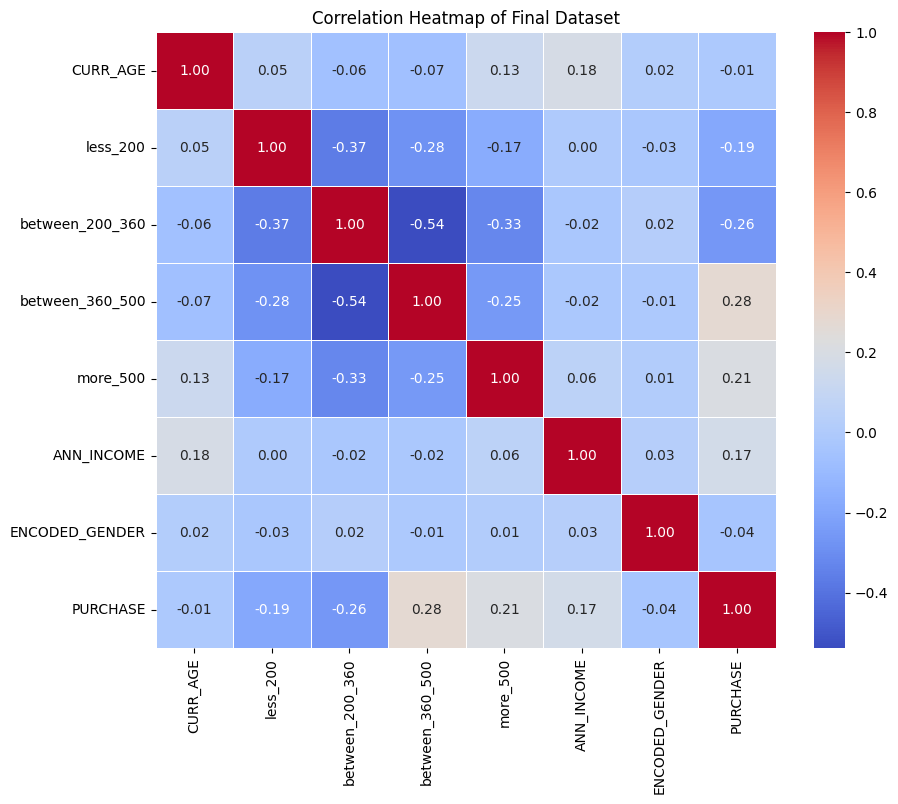

In [31]:
import seaborn as sns

corr_matrix = final_dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Final Dataset')
plt.show()

In [32]:
X = final_dataset.drop('PURCHASE',axis=1)
y = final_dataset['PURCHASE']

In [33]:
print("Number of rows in X after removing duplicates:", X.shape[0])
print("Number of rows in y after removing duplicates:", y.shape[0])

Number of rows in X after removing duplicates: 39993
Number of rows in y after removing duplicates: 39993


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Scaling only continuous features
continuous_features = ['CURR_AGE', 'ANN_INCOME']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [36]:
X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])

In [37]:
# Ensure encoded gender is not scaled
X_train_scaled['ENCODED_GENDER'] = X_train['ENCODED_GENDER']
X_test_scaled['ENCODED_GENDER'] = X_test['ENCODED_GENDER']

In [38]:
X_train_scaled.head()

,CURR_AGE,less_200,between_200_360,between_360_500,more_500,ANN_INCOME,ENCODED_GENDER
39165,-1.525024,1,0,0,0,-1.465570,0
25494,0.591738,0,0,1,0,-0.679805,1
13924,-1.525024,0,0,1,0,-0.224151,1
33266,0.676408,1,0,0,0,2.172714,0
33779,-0.000956,0,1,0,0,-1.309974,0


In [39]:
X_test_scaled.head()

,CURR_AGE,less_200,between_200_360,between_360_500,more_500,ANN_INCOME,ENCODED_GENDER
5071,1.184431,0,0,1,0,0.816048,0
31583,-0.424308,0,1,0,0,0.495474,1
17326,1.184431,0,0,1,0,-0.663703,0
21850,-0.000956,0,0,1,0,1.645189,0
25458,-0.762990,0,1,0,0,0.195399,0


In [40]:
print("Number of rows in X_train_scaled after splitting :", X_train_scaled.shape[0])
print("Number of rows in y_train after splitting :", y_train.shape[0])
print("Number of rows in X_test_scaled after splitting :", X_test_scaled.shape[0])
print("Number of rows in y_test after splitting :", y_test.shape[0])

Number of rows in X_train_scaled after splitting : 27995
Number of rows in y_train after splitting : 27995
Number of rows in X_test_scaled after splitting : 11998
Number of rows in y_test after splitting : 11998


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.6747791298549758
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.67      0.64      5124
           1       0.73      0.68      0.70      6874

    accuracy                           0.67     11998
   macro avg       0.67      0.67      0.67     11998
weighted avg       0.68      0.67      0.68     11998

Confusion Matrix for Logistic Regression:
 [[3443 1681]
 [2221 4653]]


In [43]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_tree))

Decision Tree Accuracy: 0.634605767627938
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57      5124
           1       0.68      0.68      0.68      6874

    accuracy                           0.63     11998
   macro avg       0.63      0.63      0.63     11998
weighted avg       0.63      0.63      0.63     11998

Confusion Matrix for Decision Tree:
 [[2915 2209]
 [2175 4699]]


In [44]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_forest = random_forest.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_forest))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_forest))

Random Forest Accuracy: 0.6501916986164361
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.58      0.59      5124
           1       0.69      0.70      0.70      6874

    accuracy                           0.65     11998
   macro avg       0.64      0.64      0.64     11998
weighted avg       0.65      0.65      0.65     11998

Confusion Matrix for Random Forest:
 [[2987 2137]
 [2060 4814]]


In [45]:
# Support Vector Machine
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Support Vector Machine Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svc))

Support Vector Machine Accuracy: 0.6911985330888482
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.75      0.67      5124
           1       0.78      0.65      0.71      6874

    accuracy                           0.69     11998
   macro avg       0.69      0.70      0.69     11998
weighted avg       0.71      0.69      0.69     11998

Confusion Matrix for SVM:
 [[3845 1279]
 [2426 4448]]


In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# Define the models and parameter grids
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),

}


In [48]:
# defining parameters
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
}

In [49]:
# Perform Grid Search with K-Fold Cross-Validation
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")

    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_:.4f}\n")

Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score for Logistic Regression: 0.6846

Training Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
Best cross-validation score for Decision Tree: 0.6952

Training Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.6972



# 4. Metrics associated with the validation, performance, and evaluation of the model

In [85]:
# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"----------------------{model_name}-----------------------")
    print(f"Test accuracy of best {model_name}: {accuracy:.4f}")
    print(f"Classification report of best {model_name}:\n", classification_report(y_test, y_pred))
    print(f"Confusion matrix of best {model_name}:\n", confusion_matrix(y_test, y_pred))
    print("\n\n\n\n")

----------------------Logistic Regression-----------------------
Test accuracy of best Logistic Regression: 0.6749
Classification report of best Logistic Regression:
               precision    recall  f1-score   support

           0       0.61      0.67      0.64      5124
           1       0.73      0.68      0.70      6874

    accuracy                           0.67     11998
   macro avg       0.67      0.67      0.67     11998
weighted avg       0.68      0.67      0.68     11998

Confusion matrix of best Logistic Regression:
 [[3442 1682]
 [2219 4655]]





----------------------Decision Tree-----------------------
Test accuracy of best Decision Tree: 0.6893
Classification report of best Decision Tree:
               precision    recall  f1-score   support

           0       0.62      0.70      0.66      5124
           1       0.75      0.68      0.71      6874

    accuracy                           0.69     11998
   macro avg       0.69      0.69      0.69     11998
weight

In [51]:
best_models

{'Logistic Regression': LogisticRegression(C=0.1, solver='saga'),
 'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5),
 'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=50)}

# Prediction for Indian Market from the trained model

In [52]:
ind_dataset = pd.read_excel("/content/IN_Data.xlsx")

In [53]:
ind_df_result = ind_dataset.copy()

In [54]:
ind_dataset.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT
0,20710B05XL,54,M,1425390,2018-04-20
1,89602T51HX,47,M,1678954,2018-06-08
2,70190Z52IP,60,M,931624,2017-07-31
3,25623V15MU,55,F,1106320,2017-07-31
4,36230I68CE,32,F,748465,2019-01-27


In [55]:
ind_dataset.isnull().sum()

,0
ID,0
CURR_AGE,0
GENDER,0
ANN_INCOME,0
DT_MAINT,0


In [56]:
ind_dataset.duplicated().sum()

0

In [57]:
ind_dataset.describe()

,CURR_AGE,ANN_INCOME,DT_MAINT
count,70000.000000,7.000000e+04,70000
mean,44.995314,1.148679e+06,2018-06-28 16:10:28.662856960
min,25.000000,3.000330e+05,2016-09-14 00:00:00
25%,35.000000,8.568238e+05,2018-03-15 00:00:00
50%,45.000000,1.125152e+06,2018-07-26 00:00:00
75%,55.000000,1.438676e+06,2018-12-24 00:00:00
max,65.000000,1.999989e+06,2019-06-30 00:00:00
std,11.822122,3.994505e+05,NaN


In [58]:
ind_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          70000 non-null  object        
 1   CURR_AGE    70000 non-null  int64         
 2   GENDER      70000 non-null  object        
 3   ANN_INCOME  70000 non-null  int64         
 4   DT_MAINT    70000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.7+ MB


In [59]:
from datetime import datetime
# As mentiond in briefing to take 1 july 2019 as a reference date to calculate number of days
reference_date = pd.to_datetime('2019-07-01')
ind_dataset['DAYS_FROM_REF'] = (ind_dataset['DT_MAINT'] - reference_date).abs().dt.days

In [60]:
ind_dataset.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT,DAYS_FROM_REF
0,20710B05XL,54,M,1425390,2018-04-20,437
1,89602T51HX,47,M,1678954,2018-06-08,388
2,70190Z52IP,60,M,931624,2017-07-31,700
3,25623V15MU,55,F,1106320,2017-07-31,700
4,36230I68CE,32,F,748465,2019-01-27,155


In [61]:
ind_dataset['less_200'] = ind_dataset['DAYS_FROM_REF'].apply(lambda x: 1 if x <= 200 else 0)
ind_dataset['between_200_360'] = ind_dataset['DAYS_FROM_REF'].apply(lambda x: 1 if 200 < x <= 360 else 0)
ind_dataset['between_360_500'] = ind_dataset['DAYS_FROM_REF'].apply(lambda x: 1 if 360 < x <= 500 else 0)
ind_dataset['more_500'] = ind_dataset['DAYS_FROM_REF'].apply(lambda x: 1 if x > 500 else 0)

In [62]:
ind_dataset.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT,DAYS_FROM_REF,less_200,between_200_360,between_360_500,more_500
0,20710B05XL,54,M,1425390,2018-04-20,437,0,0,1,0
1,89602T51HX,47,M,1678954,2018-06-08,388,0,0,1,0
2,70190Z52IP,60,M,931624,2017-07-31,700,0,0,0,1
3,25623V15MU,55,F,1106320,2017-07-31,700,0,0,0,1
4,36230I68CE,32,F,748465,2019-01-27,155,1,0,0,0


In [63]:
ind_dataset['ENCODED_GENDER'] = ind_dataset['GENDER'].map({'M': 0, 'F': 1})

In [64]:
ind_final_dataset = ind_dataset[['CURR_AGE','less_200',	'between_200_360','between_360_500','more_500','ANN_INCOME','ENCODED_GENDER']]

In [65]:
ind_final_dataset.head()

,CURR_AGE,less_200,between_200_360,between_360_500,more_500,ANN_INCOME,ENCODED_GENDER
0,54,0,0,1,0,1425390,0
1,47,0,0,1,0,1678954,0
2,60,0,0,0,1,931624,0
3,55,0,0,0,1,1106320,1
4,32,1,0,0,0,748465,1


In [66]:
continuous_features = ['CURR_AGE', 'ANN_INCOME']
ind_df_scaled = ind_final_dataset.copy()
ind_df_scaled[continuous_features] = scaler.fit_transform(ind_df_scaled[continuous_features])
ind_df_scaled['ENCODED_GENDER'] = ind_df_scaled['ENCODED_GENDER']

In [67]:
ind_df_scaled.head()

,CURR_AGE,less_200,between_200_360,between_360_500,more_500,ANN_INCOME,ENCODED_GENDER
0,0.761686,0,0,1,0,0.692735,0
1,0.169572,0,0,1,0,1.327522,0
2,1.269213,0,0,0,1,-0.543387,0
3,0.846274,0,0,0,1,-0.106043,1
4,-1.099245,1,0,0,0,-1.001917,1


In [68]:
ind_df_scaled.describe()

,CURR_AGE,less_200,between_200_360,between_360_500,more_500,ANN_INCOME,ENCODED_GENDER
count,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,7.000000e+04,70000.000000
mean,-6.252776e-17,0.265443,0.270129,0.267014,0.197414,6.344132e-17,0.499586
std,1.000007e+00,0.441572,0.444029,0.442403,0.398050,1.000007e+00,0.500003
min,-1.691359e+00,0.000000,0.000000,0.000000,0.000000,-2.124548e+00,0.000000
25%,-8.454815e-01,0.000000,0.000000,0.000000,0.000000,-7.306459e-01,0.000000
50%,3.963542e-04,0.000000,0.000000,0.000000,0.000000,-5.889888e-02,0.000000
75%,8.462742e-01,1.000000,1.000000,1.000000,0.000000,7.259975e-01,1.000000
max,1.692152e+00,1.000000,1.000000,1.000000,1.000000,2.131219e+00,1.000000


In [69]:
for model_name, model in best_models.items():
    y_pred = model.predict(ind_df_scaled)
    dataset_name = 'ind_' + '_'.join(model_name.split()) + '_predicted'
    new_dataset = ind_df_result.copy()
    new_dataset['PREDICTED_PURCHASE'] = y_pred
    new_dataset.to_excel(f"{dataset_name}.xlsx", index=False)


In [70]:
lr_pred = pd.read_excel("/content/ind_Logistic_Regression_predicted.xlsx")

In [71]:
dt_pred = pd.read_excel("/content/ind_Decision_Tree_predicted.xlsx")

In [72]:
rf_pred = pd.read_excel("/content/ind_Random_Forest_predicted.xlsx")

In [73]:
lr_pred.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT,PREDICTED_PURCHASE
0,20710B05XL,54,M,1425390,2018-04-20,1
1,89602T51HX,47,M,1678954,2018-06-08,1
2,70190Z52IP,60,M,931624,2017-07-31,1
3,25623V15MU,55,F,1106320,2017-07-31,1
4,36230I68CE,32,F,748465,2019-01-27,0


# Count of potential customers in the Indian market based on the model

In [86]:
potential_customr = dt_pred['PREDICTED_PURCHASE'].value_counts()

In [88]:
print(f"Number of potentail customer from Indian market : {potential_customr[1]}")

Number of potentail customer from Indian market : 40662


In [77]:
best_models

{'Logistic Regression': LogisticRegression(C=0.1, solver='saga'),
 'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5),
 'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=50)}

# Final Selected model is Decision Tree

### Business interpretation of the coefficients obtained for variables in the model.

In [81]:
decision_tree_model = best_models['Decision Tree']

# Feature importances
feature_importances = decision_tree_model.feature_importances_

# If you have feature names, you can map importances to features
feature_names = ['CURR_AGE','less_200',	'between_200_360','between_360_500','more_500','ANN_INCOME','ENCODED_GENDER']
importance_dict = dict(zip(feature_names, feature_importances))

print("Decision Tree Feature Importances:", importance_dict)


Decision Tree Feature Importances: {'CURR_AGE': 0.09436948519226698, 'less_200': 0.013569491715104411, 'between_200_360': 0.0, 'between_360_500': 0.24280551664301106, 'more_500': 0.2533556435205612, 'ANN_INCOME': 0.38285210716731477, 'ENCODED_GENDER': 0.013047755761741489}


### Based on coefficient of model
The Decision Tree model highlights that annual income (ANN_INCOME) is the most influential factor in predicting whether a customer will purchase a new phone, with the highest importance score. Income brackets like between_360_500 and more_500 also contribute significantly to the model, emphasizing the role of financial capability in decision-making. Age (CURR_AGE) has some influence, while gender and lower income brackets have minimal impact. This suggests that targeting wealthier individuals with higher annual incomes could be the most effective strategy, as these features are key drivers in the model's predictions.